<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to `scikit-learn` and Linear Regression

_Authors: Dave Yerrington (SF)_

---
<br>
<img src="https://i.imgur.com/ZIOIrAd.png" style="width: 500px; float: left; margin: 20px; margin-top: -20px; break: right;">
<br clear="all">


### Learning Objectives

- Define data modeling and simple linear regression
- Fit a simple and multi-linear regression with sklearn
- Interpret the coefficients of a linear regression model
- State the benefits and pitfalls of a multi-linear regression
- Assess model fit by checking assumptions and analyzing regression metrics


## Simple linear regression
---
The simple linear regression aims to capture a linear relationship between a target and a single predictor.

$$\hat{y} = b_0 + b_1 \cdot x_1$$

e.g. 

$$\hat{SalePrice} = 200,000 + 5,000 \cdot Sqrft$$

This linear equation _**is**_ your regression model. You feed it the square footage of homes and it will spit out predictions for the sale prices.

### <font color=blue>Discussion -</font> How do you verbally interpret these coefficients? What is the equivalent for KNN?

<a id='sklearn-first-steps'></a>

## First steps with `sklearn`: loading the data

---

We will load the boston housing dataset using sklearn and then construct and fit a linear regression model on the data. 

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Don't forget to turn on plotting display in the notebook
%matplotlib inline 

**Load the boston housing data with the `datasets.load_boston()` function.**

In [2]:
data = datasets.load_boston()

print data.DESCR # This is like a data dictionary!

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

**The data object we've loaded has attributes with the features, target variable, and design matrix:**

In [3]:
print data.feature_names
print data.data[0:3]
print data.target[0:3]

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   7.18500000e+00   6.11000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.92830000e+02
    4.03000000e+00]]
[ 24.   21.6  34.7]


### Putting the data in pandas for convenience

Our target is what we are predicting.  Sometimes this is called the **response variable**.

The target and the data are what we use to train, or **fit** the model with.

Scikit-learn has already split our data into the **predictors** and **response** for us. It has also stored the names of the features in a separate array. 

So we can print things like the header of the data it will be more convenient to have our data in a pandas dataframe.

**Use the predictors and the feature names to create a pandas dataframe.**

In [4]:
import numpy as np
import pandas as pd

# Create dataframe of main data to use as predictors (later). AKA "X"
df = pd.DataFrame(data.data, columns=data.feature_names)

# target vector (MEDV)
target = data.target

print df.shape
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Our training set is a matrix / dataframe with many variables (**CRI, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B,** and **LSTAT**). We have **13** predictors with **506** rows/observations.

Our target is a vector that represents a single variable (**MEDV**), which has exactly the same number of observations as our training set: **506**.

> _Training (fit) and target datasets must always match in length!_

<a id='first-model-sklearn'></a>

## Fitting our 1st model with `sklearn`

---

Now let's fit a linear regression model with the housing data. 

First let's visually identify some predictors that seem to have a relationship with house value. 

**Plot RM and LSTAT against the target variable with seaborn.** 

> _Note: If for some reason scikit-learn crashes the jupyter notebook, have conda remove mkl (there's an issue with the newer build on some systems)._

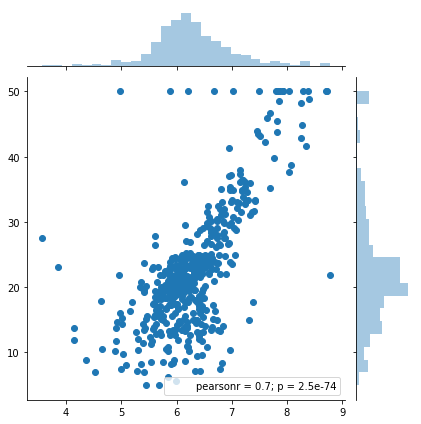

In [5]:
sns.jointplot(df.RM.values, target)

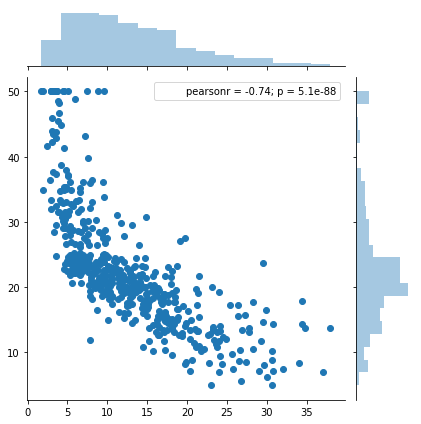

In [6]:
sns.jointplot(df.LSTAT.values, target)

**Below we fit a linear regression model predicting `MEDV` (the target vector) from `RM`.**

> **Note:** sklearn models expect the predictor matrix to be 2D and the target to be 1D.

In [7]:
#0 - prepare data
X = df[["RM"]]
y = target 

#1 - instantiate the model
lm = LinearRegression()

#2 - fit data
lm.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print "b1 slope coefficient: {}".format(lm.coef_[0])
# b1 or slope of line

b1 slope coefficient: 9.10210898118


In [9]:
lm.intercept_
#b0 or intercept of line

-34.670620776438568

In [11]:
lm.coef_
#need [0] because it is in array type

array([ 9.10210898])

In [12]:
def boston_slr(rm):
    """
    Input: average rooms per house in a neighborhood (float)
    Returns: the predicted median value of homes
    """
    medv = lm.intercept_ + lm.coef_[0]*rm
    return medv

In [13]:
boston_slr(4)

1.7378151482826709

In [15]:
boston_slr(X.iloc[0,0])

25.175745774821969

In [16]:
lm.predict(X.iloc[[0],:1])

array([ 25.17574577])

In [19]:
boston_slr(X["RM"]).head()

0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
Name: RM, dtype: float64

In [20]:
X["RM"].map(boston_slr).head()

0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
Name: RM, dtype: float64

**Make predictions for the X matrix using `.predict(X)`, and score the model ($R^2$) using `model.score(X, y)`.**

Plot the predicted values against the true values of the target, and print the model $R^2$.

> **`.score(predictors, target)`**: a class method / function that returns the coefficient of determination R^2 of the prediction (for regression models).  Found in many models in scikit-learn (but not all).

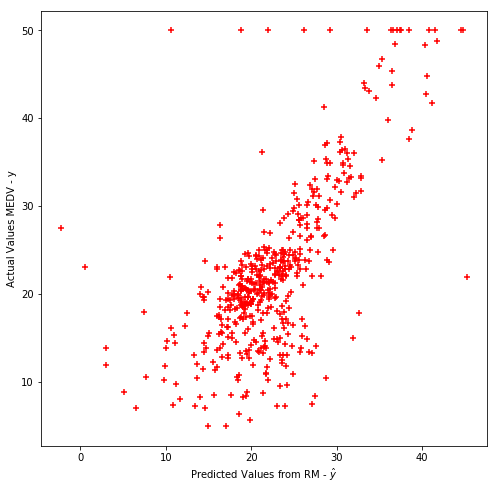

score:  0.483525455991


In [21]:
predictions = lm.predict(X)
score = lm.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

print "score: ", score

**What can this plot tell us about the model?**

In [ ]:
#A: quality of predictions and if predictions are systematically off for certain values of target

<a id='model-attributes'></a>

## sklearn model class attributes

---

After you run `.fit()`, a sklearn model object often contains a variety of calculated metrics, coefficients, and other information. Which metrics and attributes are present will depend on the model – consult the documentation for specifics. 

Attributes in the `LinearRegression` object include:
- **`.coef_`**: property containing the coeffients for the predictor variables
- **`.intercept_`**: value of the intercept

**Print out the beta coefficient and intercept for the model.**


In [22]:
print lm.coef_
print lm.intercept_

[ 9.10210898]
-34.6706207764


### Interpreting regression coefficients
---

In [ ]:
# A 
# predictor: avg number of rooms
# for increase in avg by 1, we expect median price of homes in neighboorhood to increase by $9100

<a id='common-metrics'></a>

## Metrics for evaluating regression models


As we venture down the path of modeling, it can be difficult to determine which choices are "correct" or "incorrect".  A primary challenge is to understand how different models will perform in different circumstances and different types of data. It's essential to practice modeling on a variety of data.

As a beginner it is essential to learn which metrics are important for evaluating your models and what they mean. The metrics we evaluate our models with inform our actions.  

*Exploring datasets on your own with the skills and tools you learn in class is highly recommended!*

---

### The $R^2$, aka "coefficient of determination"

The primary regression metric is the $R^2$. It ranges from negative infinity to 1.  

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

Where the residual sum of squares is the sum of squared residuals for our model:

$SS_{res}=\sum_i (y_i - \hat{y})^2$

And the total sum of squares is the sum of squared residuals if all of your predictions were just the mean of the outcome value in the training set. In other words, this is the variance of your target.

$SS_{tot} = \sum_i (y_i-\bar{y})^2$

#### Visual intution
Let's play around with this [interactive plotter](http://illuminations.nctm.org/activity.aspx?id=6817) for residual sum of squares.

$R^2$ is the most common metric to evaluate a regression and is the default scoring measure in sklearn, just like how for KNN (and other classification models the `.score` function defaults to accuracy.

### Unscaled metrics: _mean squared error_ and _mean absolute error_ 

#### Mean squared error (MSE)
"The average squared residual". This is the actual quantity that the linear regression model minimizes to fit the beta coefficients to the data. A large MSE is bad; small is better.
### $$MSE = \frac{1}{N}\sum_{i=0}^{N}(y_i - \hat{y_i})^2$$


#### Mean absolute error (MAE)

### $$MAE = \frac{1}{N}\sum_{i=0}^{N}\left|y_i - \hat{y_i}\right|$$

### <font color=blue>Discussion - </font> What are the advantages and the tradeoffs of these three metrics?

-MSE is not interpretable : This is what your model is trying to minimize
-MAE is interpretable 


### Let's calculate the mean absolute error "by hand" of our model on the training set

In [ ]:
#A: 

### <font color=blue>Independent - </font> Calculate the $R^2$ of our model's predictions on the boston dataset.
First calculated it "by hand" using numpy or pandas as your calculator. Then check your answer with the function from the `sklearn.metrics` module. You are going to need to compare the predicted and actual `MEDV` values.

In [ ]:
#A:


<a id='mlr-sklearn'></a>

## Fit a Multi-linear regression using sklearn

---
Why limit ourself to one predictor column? Our target is probably linearly impacted by many variables.

$$Income = b_0 + b_1 \cdot Seniority\, + \, b_2\cdot EducationYears$$


<img src=https://i.imgur.com/apd97rl.png width="75%">

We have fit a simple linear regression predicting `MEDV ~ RM + 1` (where the 1 represents the intercept). Use the same sklearn process and `LinearRegression` model to estimate the target with both `RM` and `LSTAT`.

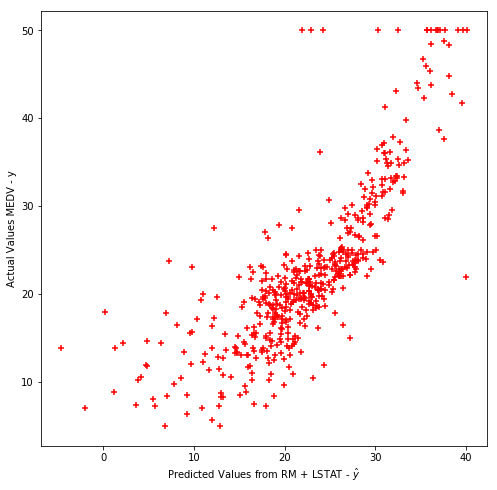

score:  0.63856160626


In [25]:
lm = LinearRegression()

X = df[["RM","LSTAT"]]
y = target 

model = lm.fit(X, y)

predictions =  model.predict(X)
score = model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM + LSTAT - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

print "score: ", score

**Print out the coefficients from this MLR model and interpret them.**

In [24]:
print model.coef_

[ 5.09478798 -0.64235833]


In [27]:
dict(zip(X.columns, model.coef_))
#connect list to columns

{'LSTAT': -0.64235833424412925, 'RM': 5.0947879843365449}

### <font color=blue>Discussion - </font> How do we interpret the coefficients in a multi-linear regression?

<a id='negative-r2'></a>

## A note on negative $R^2$ values

---

Over the course of this class you will encounter negative $R^2$ values. This may seem impossible, and it is in the standard scenario where we are calculating the $R^2$ score on the data we fit the model with.

However, if you fit your model on one sample of data, *then score the model on new data not used to fit the model*, it is possible to end up with negative $R^2$.

**What does it mean to have a negative $R^2$?**

Remember that $R^2$ is 1 minus the error of your regression model divided by the error of the baseline model. A negative $R^2$ means that the regression model is performing *worse* than the baseline model. In the context of fitting our data on one sample of data and scoring on another sample, this means that we would have been better off making predictions on the test sample just using the mean of the target variable in our training set.

We will return to the topic of negative $R^2$ when we talk about training and testing sets and cross-validation.

<a id='independent-practice'></a>

## Independent practice

---

Build a model using any set of **continuous** variables of your choice. Evaluate your model using $R^2$. Describe what the $R^2$ means.

In [28]:
from sklearn.model_selection import train_test_split

In [54]:
# A

df["medv"] =  y

In [55]:
df.corr()["medv"].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
medv       1.000000
Name: medv, dtype: float64

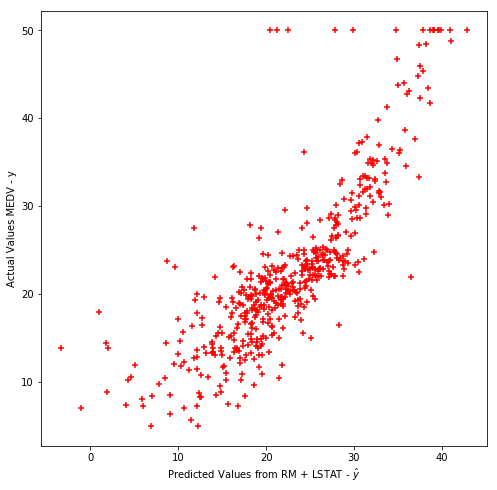

score:  0.678643485576


In [56]:
X = df[["PTRATIO", "RM", "INDUS", "LSTAT"]]
Y = target


model_2 = lm.fit(X, Y)

predictions =  model_2.predict(X)
score = model_2.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM + LSTAT - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

print "score: ", score

In [57]:
dict(zip(X.columns, model.coef_))

{'INDUS': 0.0075668059009810192,
 'LSTAT': -0.57571065526570853,
 'PTRATIO': -0.93512211740334938,
 'RM': 4.5151786563147134}

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size= 0.25)


In [64]:

model = lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)



## Summary
---

- Linear regression seeks a linear relationship between a continuous target and one or more predictors
- Interpret coefficients as "The expected change in the target when predictor ____ is increased by one unit, if all else is held equal"
- Common regression metrics are $R^2$, mean squared error, and mean absolute error